## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.7 MB/s eta 0:00:00


## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [6]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [12]:
TotalPrice_mean = df["TotalPrice"].mean()
TotalPrice_std = df["TotalPrice"].std()

print("모집단 TotalPrice 평균:{}".format(TotalPrice_mean))
print("모집단 TotalPrice 표준편차:{}".format(TotalPrice_std))

모집단 TotalPrice 평균:17.98779487699964
모집단 TotalPrice 표준편차:378.8108235059747


In [13]:
sample = df.sample(n=1000)

sample_mean = sample["TotalPrice"].mean()
sample_std = sample["TotalPrice"].std()

print("표본 TotalPrice 평균:{}".format(sample_mean))
print("표본 TotalPrice 표준편차:{}".format(sample_std))

표본 TotalPrice 평균:17.81061
표본 TotalPrice 표준편차:49.06683102294803


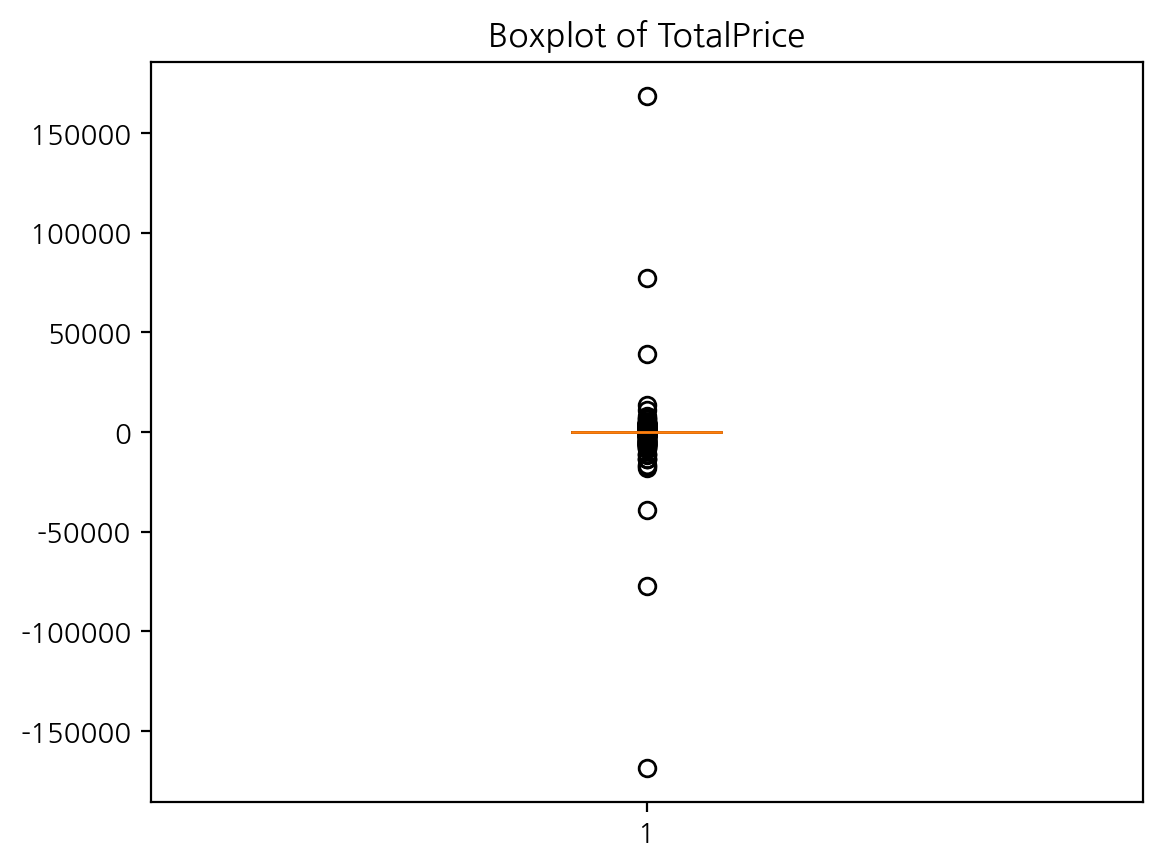

필터링된 모집단 TotalPrice의 평균: 14.889252967799166
필터링된 모집단 TotalPrice의 표준편차: 20.95762644356086


In [15]:
plt.boxplot(df['TotalPrice'])
plt.title("Boxplot of TotalPrice")
plt.show()

q_low = df['TotalPrice'].quantile(0.01)
q_high = df['TotalPrice'].quantile(0.99)

filtered_df = df[(df['TotalPrice'] > q_low) & (df['TotalPrice'] < q_high)]

new_population_mean = filtered_df['TotalPrice'].mean()
new_population_std = filtered_df['TotalPrice'].std()

print("필터링된 모집단 TotalPrice의 평균:", new_population_mean)
print("필터링된 모집단 TotalPrice의 표준편차:", new_population_std)


In [17]:
sample = df.sample(n=1000, random_state=1234)

population_mean = df['TotalPrice'].mean()
population_std = df['TotalPrice'].std()

sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std()

print("모집단의 평균:", population_mean)
print("모집단의 표준편차:", population_std)
print("표본의 평균:", sample_mean)
print("표본의 표준편차:", sample_std)


모집단의 평균: 17.98779487699964
모집단의 표준편차: 378.8108235059747
표본의 평균: 17.348599999999998
표본의 표준편차: 31.743778526116184


1. 모집단과 표본의 차이
- 모집단과 표본의 평균은 거의 동일하지만 표준편차는 표본이 모집단보다 매우 작다. 이는 표본은 모집단 일부만을 대표하므로, 모집단의 모든 변동성을 반영하지 못하기 때문이다.   

<br/>



2. 중심극한정리의 적용
- 중심극한정리는 충분히 큰 표본 크기를 가진 여러 표본의 평균이 정규분포를 따른다는 원리
- 이를 시연하기 위해 여러 차례 무작위 표본을 추출하고, 각각 표본 평균을 계산하여 이들 분포를 관찰해야 함
- 위 예에서 표본 크 기가 1000개로 충분히 크므로, 표본 평균은 모집단 평균에 근접한다.   

<br/>



3. 결론
- 모집단과 표본의 평균은 거의 동일하나, 표준편차는 차이가 많이 난다.
- 이는 중심극한 정리에 따라 충분히 큰 표본을 추출하면 그 표본의 평균은 모집단 평균에 가까워지기 때문이다.   

<br/>

4. 추가 - 박스플롯을 그려본 결과 모집단에서 이상치가 존재하여 이런 변동성이 반영되어 표준편차에서 큰 차이가 발생하는 듯 하다.


## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [19]:
# 1) 데이터 로드 후 두 컬럼 찾기
from scipy import stats
df[['TotalPrice', 'Country']]

,TotalPrice,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom
...,...,...
541904,10.20,France
541905,12.60,France
541906,16.60,France
541907,16.60,France


In [20]:
df['Country']=='Unitied Kingdom'.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [27]:
# 2) 데이터셋에서 주문이 가장 많은 상위 두 국가 찾기

top_countries = df['Country'].value_counts().head(2).index.tolist()
print(top_countries)

['United Kingdom', 'Germany']


- 주문 수 가장 많은 두 국가 : United Kingdom(495478), Germany(9495)

In [21]:
# 각 국가 TotalPrice 평균 차이 검증
df.groupby('Country')['TotalPrice'].mean()

Country
Australia               108.877895
Austria                  25.322494
Bahrain                  28.863158
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.499063
Cyprus                   20.813971
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     32.122599
European Community       21.176230
Finland                  32.124806
France                   23.069288
Germany                  23.348943
Greece                   32.263836
Hong Kong                35.128611
Iceland                  23.681319
Israel                   26.625657
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.059696
Norway                   32.378877
Poland                   21.152903
Portugal                 19.333127
RSA         

In [24]:
# 3) 통계적 검증 수행하기
# 4) 두 국가 TotalPrice 평균 계산
countries = ['United Kingdom', 'Germany']
mean_per_country = df.groupby('Country')['TotalPrice'].mean().loc[countries]
print(mean_per_country)

Country
United Kingdom    16.525065
Germany           23.348943
Name: TotalPrice, dtype: float64


In [29]:
# 5) 독립표본 t-검정 수행
from scipy.stats import ttest_ind


data_country1 = df[df['Country'] == top_countries[0]]['TotalPrice']
data_country2 = df[df['Country'] == top_countries[1]]['TotalPrice']

# 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(data_country1, data_country2, equal_var=False)

print(f"t-Statistic: {t_stat}, p-value: {p_value}")

# t-통계량과 p-값 해석
if p_value < 0.05:
    print("두 국가의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("두 국가의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 없습니다.")


t-Statistic: -10.046360185819829, p-value: 9.823416115791871e-24
두 국가의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 있습니다.


6. 결과해석   
- t-통계량과 p-값을 확인
  - p-val < 0.05 →  두 국가 간 TotalPrice 평균에 통계적으로 유의미한 차이가 있다고 해석할 수 있음
- 1,2 종 오류 설명
  - 1종 오류(Type 1 Error) : 귀무가설이 참인데도 불구하고 잘못하여 귀무가설을 기각하는 오류   
    → 이 데이터셋에서 1종 오류 - 두 국가 간 'TotalPrice' 평균에 차이 없음에도 있다고 결론
  - 2종 오류(Type 2 Error) : 대립가설이 참인데도 불구하고 잘못하여 귀무가설을 채택하는 오류   
    → 이 데이터셋에서 2종 오류 - 두 국가 간 'TotalPrice' 평균 차이 있음에도 없다고 결론


### 미션2 검증 결과 해석
- t-통계량: -10.04636   
- p-value: 9.823416115791871e-24 (매우 작음)   
- p-value가 0.05보다 훨씬 작기 때문에, 통계적으로 유의미한 차이가 있다고 결론지을 수 있다. 귀무가설 기각하고 대립 가서라 채택. 즉, 두 국가 영국과 독일 간의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 존재한다고 볼 수 있음
  - 귀무 가설 : 두 국가 'TotalPrice' 평균이 동일하다.
  - 대립 가설 : 두 국가 'TotalPrice' 평균이 다르다.   

   <br/>

- 1종 오류와 2종 오류 설명
  - 1종 오류 (Type 1 Error): 이 경우, 1종 오류는 두 국가 간의 'TotalPrice' 평균에 차이가 없음에도 불구하고, 차이가 있다고 잘못 결론 내리는 상황. p-value가 매우 낮기 때문에 이 데이터셋에서 1종 오류가 발생했을 가능성은 낮다. 그러나 이는 우리가 표본을 사용하여 추정을 하고 있기 때문에, 항상 일정 수준의 오류 가능성이 존재할 수 있다는 점!
  - 2종 오류 (Type 2 Error): 이 경우, 2종 오류는 실제로는 두 국가 간의 'TotalPrice' 평균에 차이가 있음에도 불구하고, 차이가 없다고 잘못 결론 내리는 상황을 의미. p-value가 매우 낮아서 결론은 차이가 있다는 것이므로, 이 경우 2종 오류는 발생하지 않았다고 볼 수 있다.
    - 표본 크기가 충분하지 않거나 표본이 모집단을 대표하지 않는 경우 통계적 검증 한계로 발생할 수 있음

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [30]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요.

In [83]:
print("주중 데이터 기술통계:")
print(weekday_data['UnitPrice'].describe().round(2))
variance = weekday_data['UnitPrice'].var()
print(variance.round(2))
print(weekday_data['UnitPrice'].median().round(2))

주중 데이터 기술통계:
count    477534.00
mean          4.84
std         103.03
min      -11062.06
25%           1.25
50%           2.10
75%           4.13
max       38970.00
Name: UnitPrice, dtype: float64
10615.6
2.1


In [81]:
print("\n주말 데이터 기술통계:")
print(weekend_data['UnitPrice'].describe().round(2))
variance = weekend_data['UnitPrice'].var()
print(variance.round(2))


주말 데이터 기술통계:
count    64375.00
mean         2.89
std          7.96
min          0.00
25%          1.25
50%          1.85
75%          3.75
max       1236.75
Name: UnitPrice, dtype: float64
63.35
1.85


1. 기술 통계
- 주중 데이터 기술 통계
  - 평균: 4.84, 중간값: 2.1, 표준편차: 103.03, 분산: 10615.6, 분위수(25%: 1.25, 50%: 2.10, 75%: 4.13)
- 주말 데이터 기술 통계
  - 평균: 2.89, 중간값: 1.85, 표준편차: 7.96, 분산: 63.35, 분위수(25%: 1.25, 50%: 1.85, 75%: 3.75)   

  → 표준편차가 크고 평균과 중간값도 차이나며 최댓값이 과하게 크다. 즉, 이상치가 많아보인다...
  히스토그램과 박스플롯을 그렸을 때 한쪽에 쏠려있거나 이상치로 가득한 모양이 나올 것 같다.   

2. 정리
- 이상치 영향 : 주중데이터 UnitPrice 평균이 4.84로 주말인 2.89보다 높게 나타나지만, 이는 이상치의 영향이 크다는 걸 시사한다. 특히 주중 데이터 표준편차는 103.03으로 매우 높아, 이상치가 많이 포함되어 있음을 알 수 있다. 히스토그램을 그리면 0에 가까운 값들이 대부분 나올 것이다.
- 중앙값과 평균값 차이 : 주중데이터에서 평균인 4.84와 중앙값 2.1 사이 큰 차이가 있는 것 또한 이상치 영향을 설명한다. 중앙값이 평균보다 훨씬 낮아, 데이터는 오른쪽으로 왜곡될 것이다.
- 분산과 표준편차 : 주중 데이터 분산과 표준편차가 주말에 비해 매우 높다. 주중 데이터가 주말데이터보다 넓게 퍼져 있고, 더 많은 변동성을 가지고 있음을 알 수 있다.
- 분위수 :  75% 분위수가 상대적으로 낮음. 대부분 거래가 비교적 낮은 'UnitPrice'에서 이루어졌다는 걸 알 수 있다

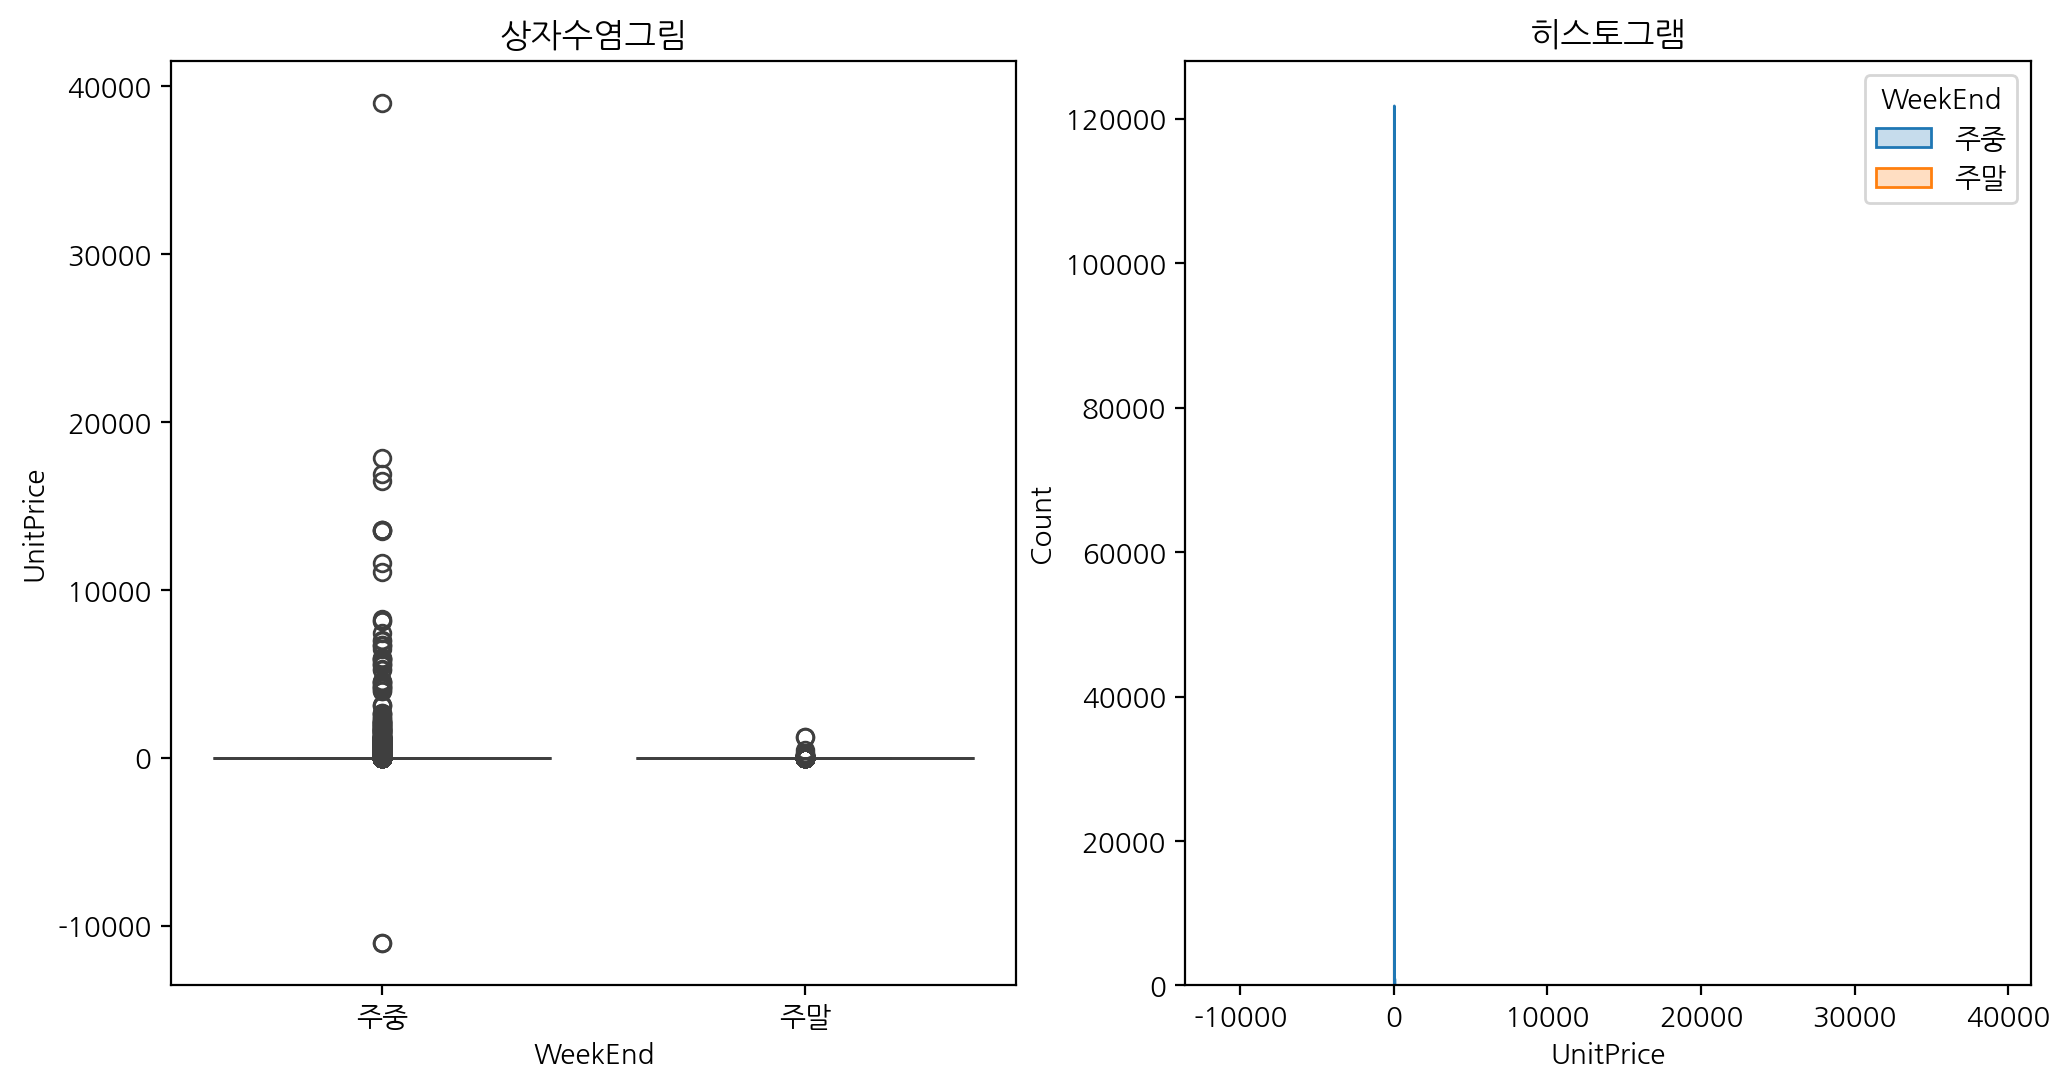

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('상자수염그림')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="UnitPrice", hue="WeekEnd", element="step", binwidth=1)
plt.title('히스토그램')
plt.show()

In [68]:
count = (weekday_data['UnitPrice'] >= 2000).sum()
print(count)

64


Text(0.5, 1.0, '상자수염그림')

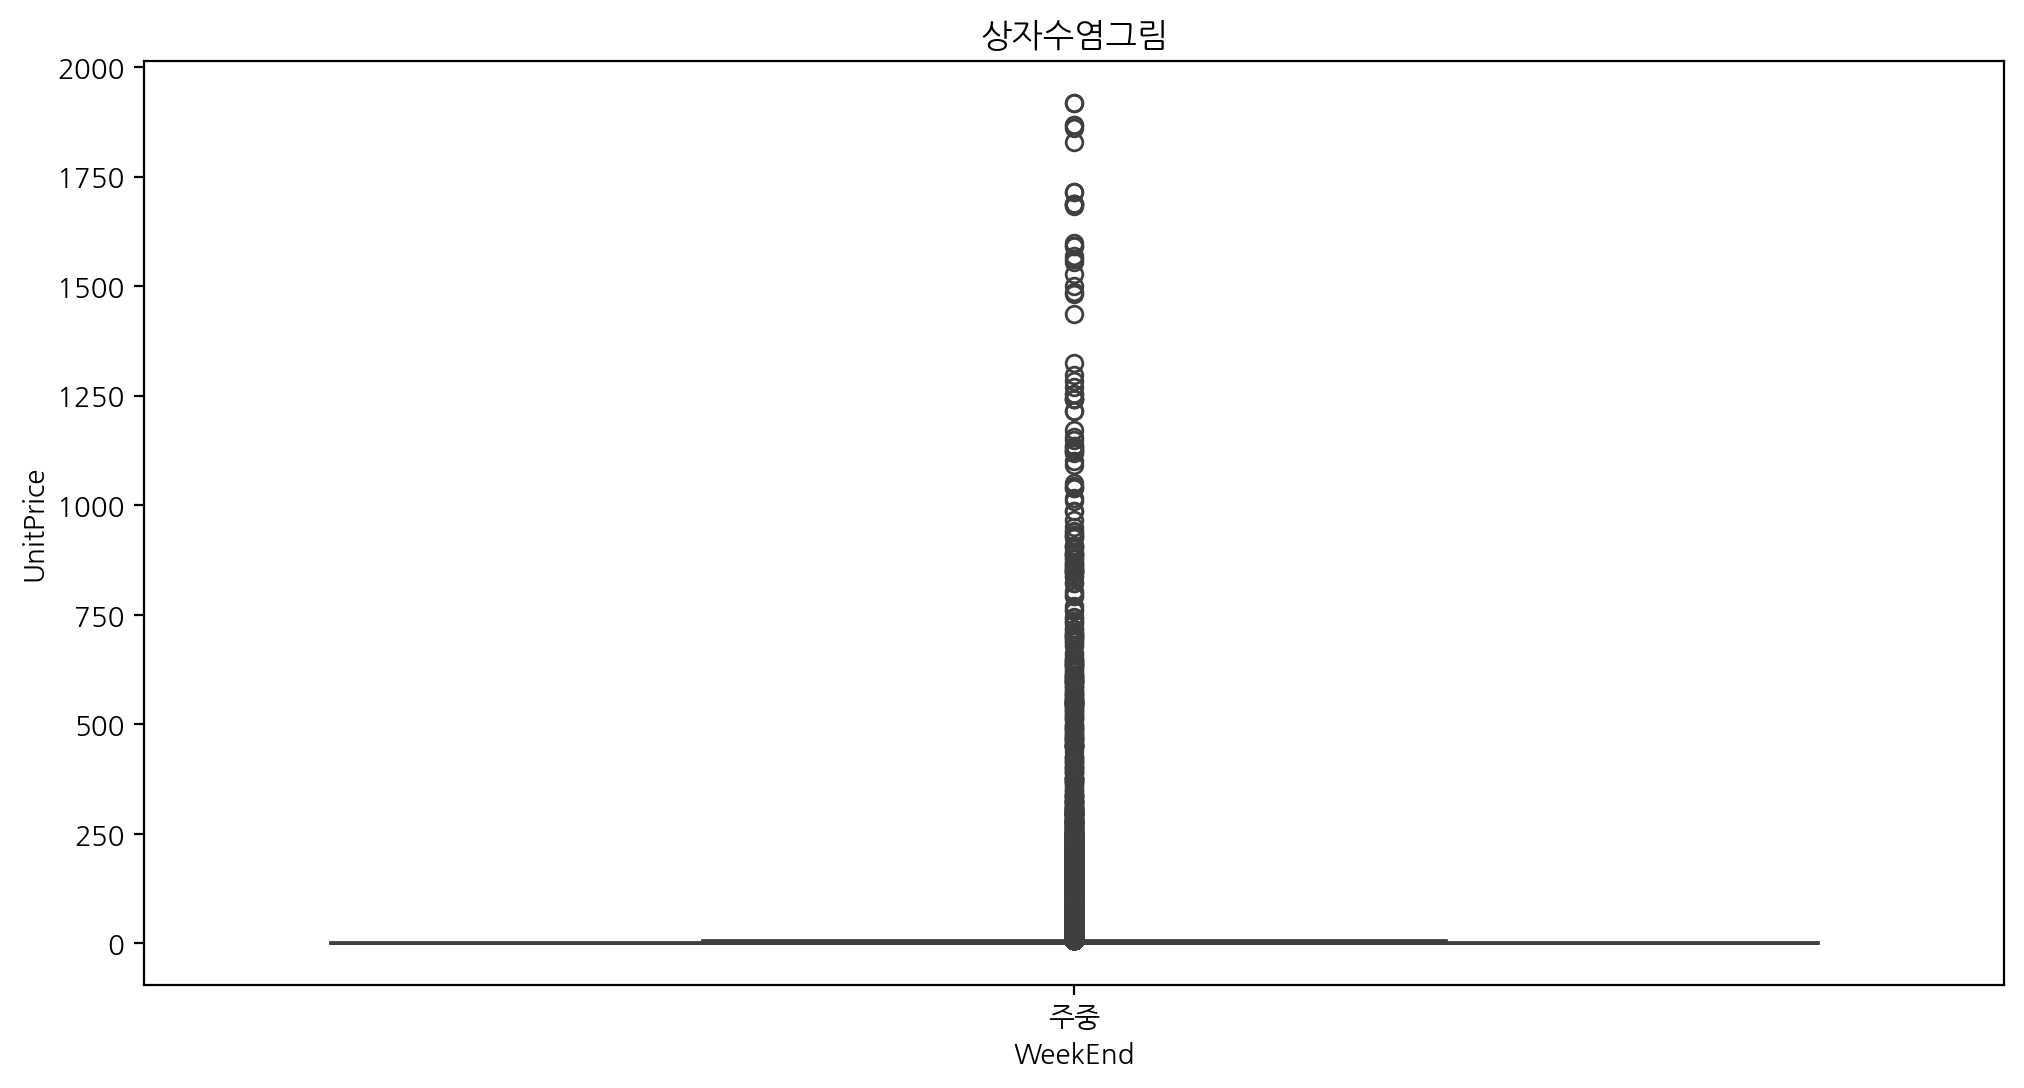

In [108]:
# 데이터 범위 조정
filtered_weekday = weekday_data[weekday_data['UnitPrice'] > 0]  # UnitPrice가 0보다 큰 데이터만 사용
filtered_weekday = filtered_weekday[filtered_weekday['UnitPrice'] < 2000]

# 상자수염그림 및 히스토그램 그리기
plt.figure(figsize=(12, 6))

sns.boxplot(x='WeekEnd', y='UnitPrice', data=filtered_weekday)
plt.title('상자수염그림')


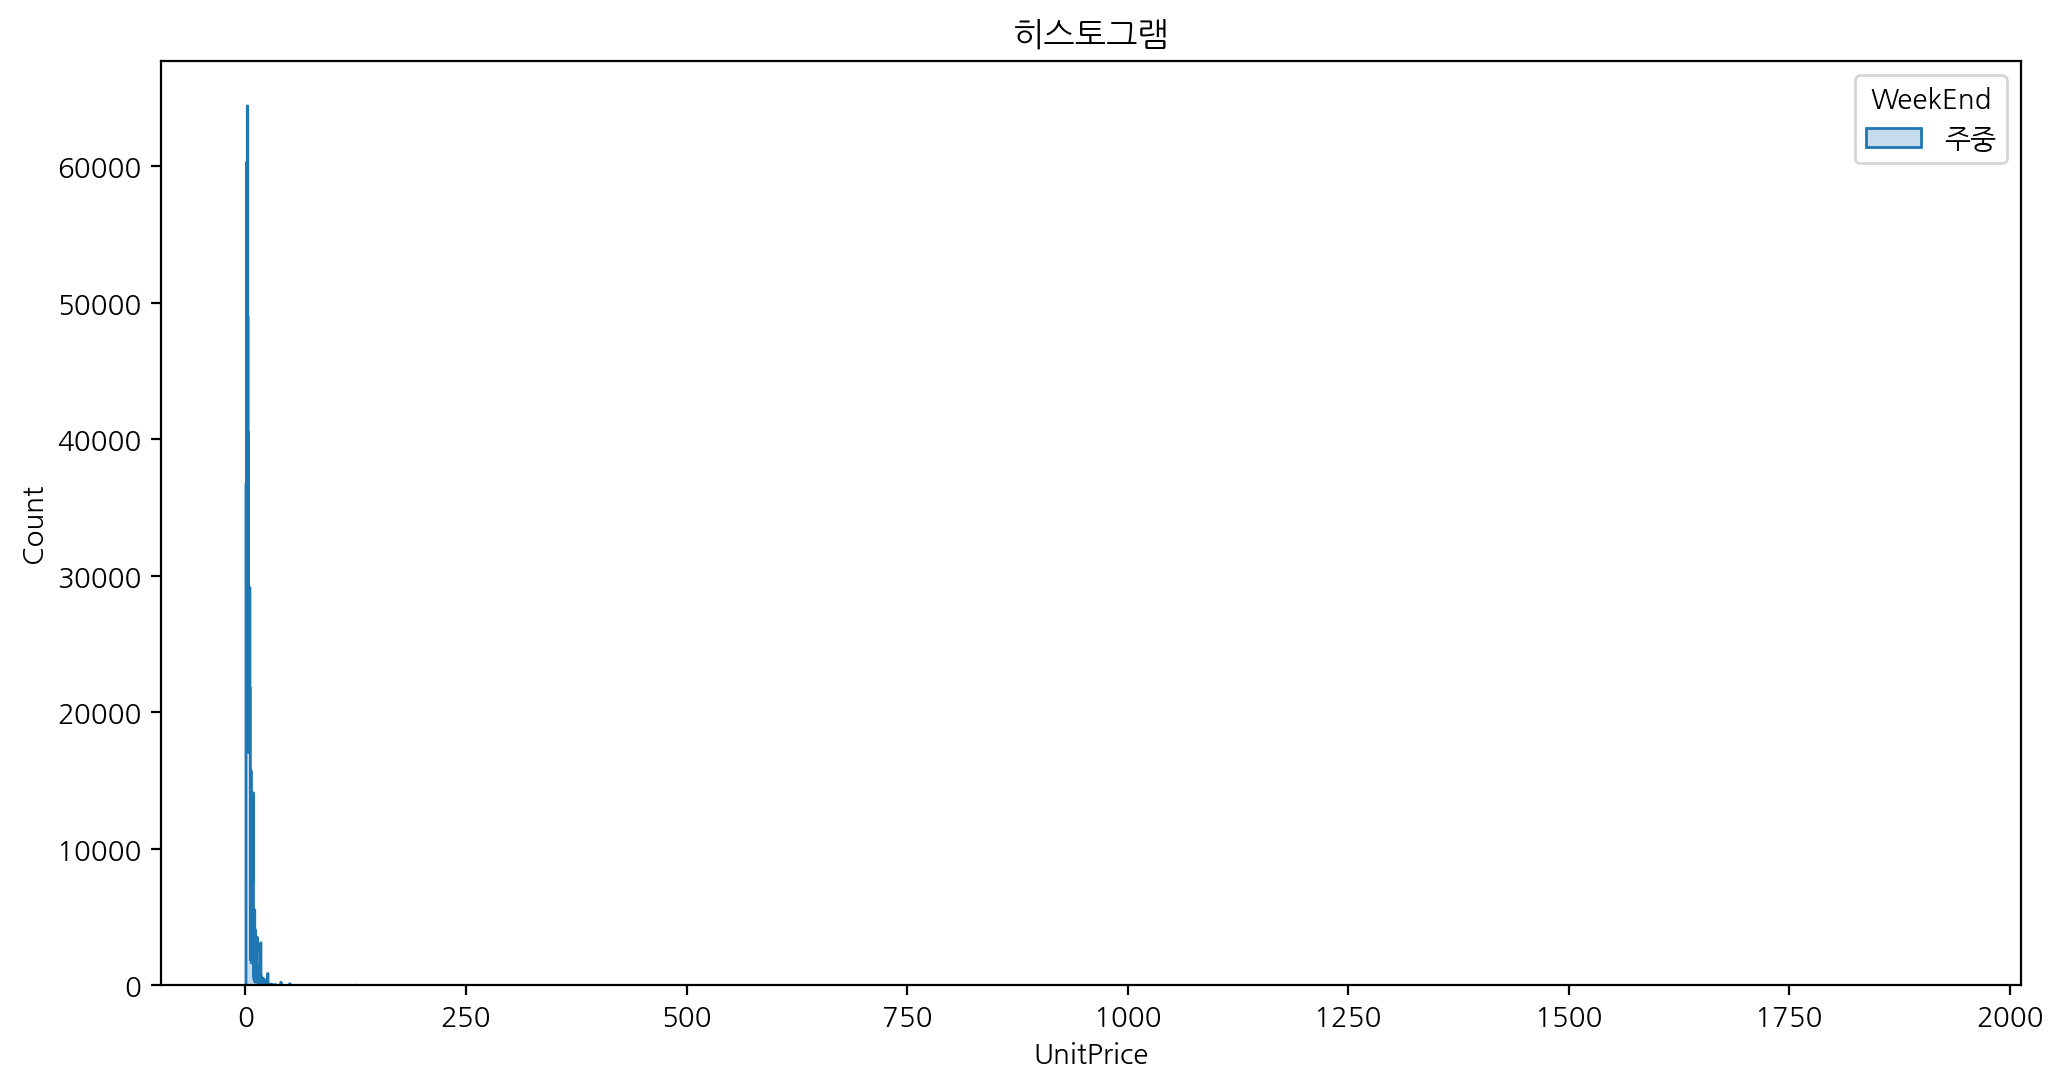

In [80]:
plt.figure(figsize=(12, 6))

sns.histplot(data=filtered_weekday, x="UnitPrice", hue="WeekEnd", element="step", binwidth=0.5)
plt.title('히스토그램')
plt.show()

In [86]:
count = (weekend_data['UnitPrice'] >= 80).sum()
print(count)

19


Text(0.5, 1.0, '상자수염그림')

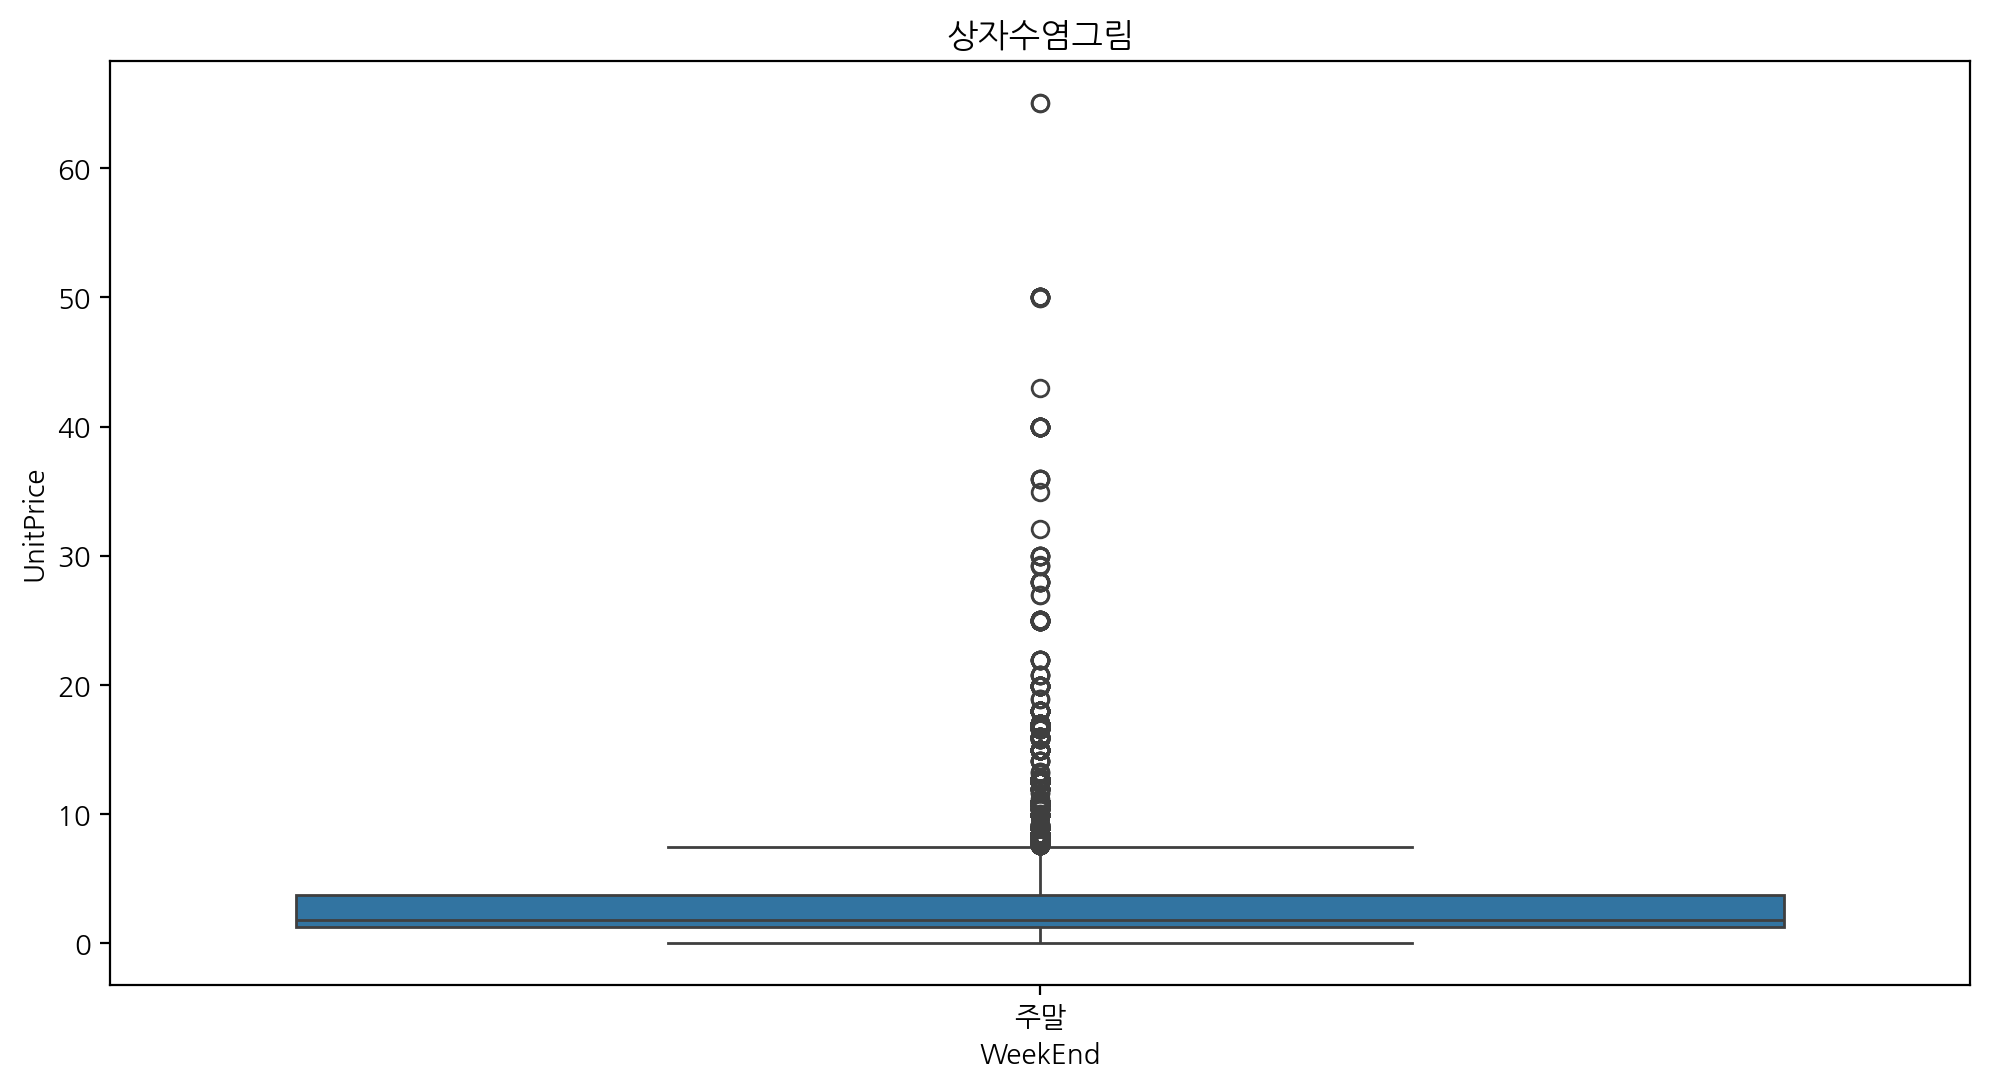

In [107]:
# 데이터 범위 조정
filtered_weekend = weekend_data[weekend_data['UnitPrice'] > 0]  # UnitPrice가 0보다 큰 데이터만 사용
filtered_weekend = filtered_weekend[filtered_weekend['UnitPrice'] < 80]

# 상자수염그림 및 히스토그램 그리기
plt.figure(figsize=(12, 6))

sns.boxplot(x='WeekEnd', y='UnitPrice', data=filtered_weekend)
plt.title('상자수염그림')

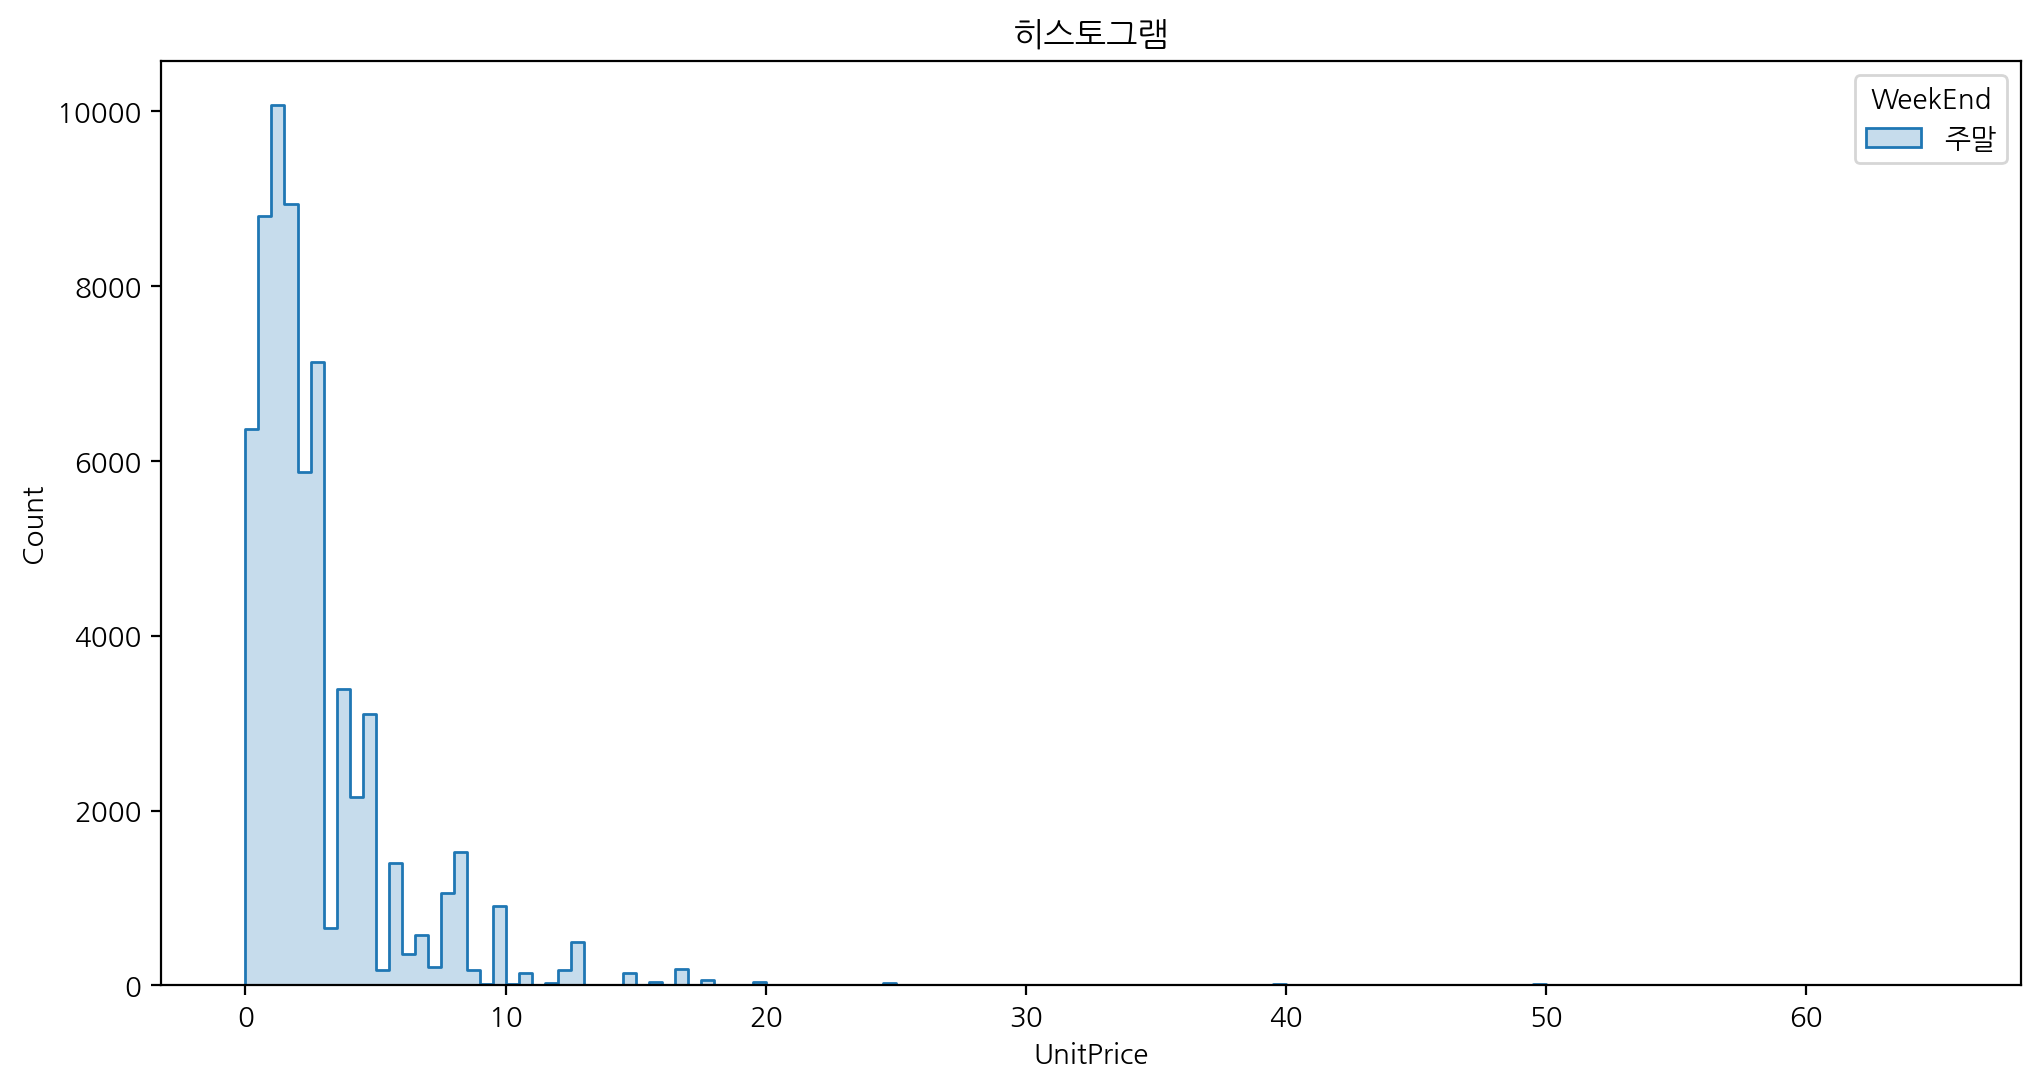

In [103]:
plt.figure(figsize=(12, 6))

sns.histplot(data=filtered_weekend, x="UnitPrice", hue="WeekEnd", element="step", binwidth=0.5)
plt.title('히스토그램')
plt.show()

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [89]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [98]:
median_value = df['TotalPrice'].median()

group1 = df[df['TotalPrice'] <= median_value]['TotalPrice']
group2 = df[df['TotalPrice'] > median_value]['TotalPrice']

stat, p = mannwhitneyu(group1, group2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 없습니다.')
else:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.')

Statistics=0.000, p=0.000
두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.


In [104]:
median_value = filtered_weekday['TotalPrice'].median()

group1 = filtered_weekday[filtered_weekday['TotalPrice'] <= median_value]['TotalPrice']
group2 = filtered_weekday[filtered_weekday['TotalPrice'] > median_value]['TotalPrice']

stat, p = mannwhitneyu(group1, group2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 없습니다.')
else:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.')

Statistics=0.000, p=0.000
두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.


In [105]:
median_value = filtered_weekday['TotalPrice'].median()

group1 = filtered_weekend[filtered_weekend['TotalPrice'] <= median_value]['TotalPrice']
group2 = filtered_weekend[filtered_weekend['TotalPrice'] > median_value]['TotalPrice']

stat, p = mannwhitneyu(group1, group2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 없습니다.')
else:
    print('두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.')

Statistics=0.000, p=0.000
두 그룹 간의 중앙값은 통계적으로 유의미한 차이가 있습니다.


### 미션4 검증결과 비즈니스 관점 분석

- 고객 세분화
  - 고객이 두 개의 명확히 구분되는 그룹으로 나뉘어 있다는 것을 시사할 수 있다.
  - 위 데이터로 보았을 때, 소액 구매자와 대량 구매자로 나눌 수 있으며, 이는 마케팅 전략이나 고객 서비스 접근 방식에 차별화를 두어야 함을 의미한다.   


- 제품 및 가격 전략
  - 중앙값 이상과 이하에서 구매하는 고객들의 구매 행태가 상이할 수 있으므로, 제품 라인업을 조정하거나 다양한 가격대의 제품을 제공하는 전략을 고려할 수 있다.   


- 수요 예측과 재고 관리
  - 두 그룹 간의 구매 행태의 차이를 이해함으로써, 보다 정확한 수요 예측과 효율적인 재고 관리 가능할 것이다.   


- 맞춤형 프로모션: 두 그룹의 구매력과 구매 습관 고려하여 맞춤형 프로모션 혹은 vip나 신규 고객을 대상으로 하는 할인 정책, 이벤트를 진행할 수 있다.

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

<ipython-input-106-7dcc7d852880>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=filtered_weekend, x="UnitPrice", y="TotalPrice", ci=95);


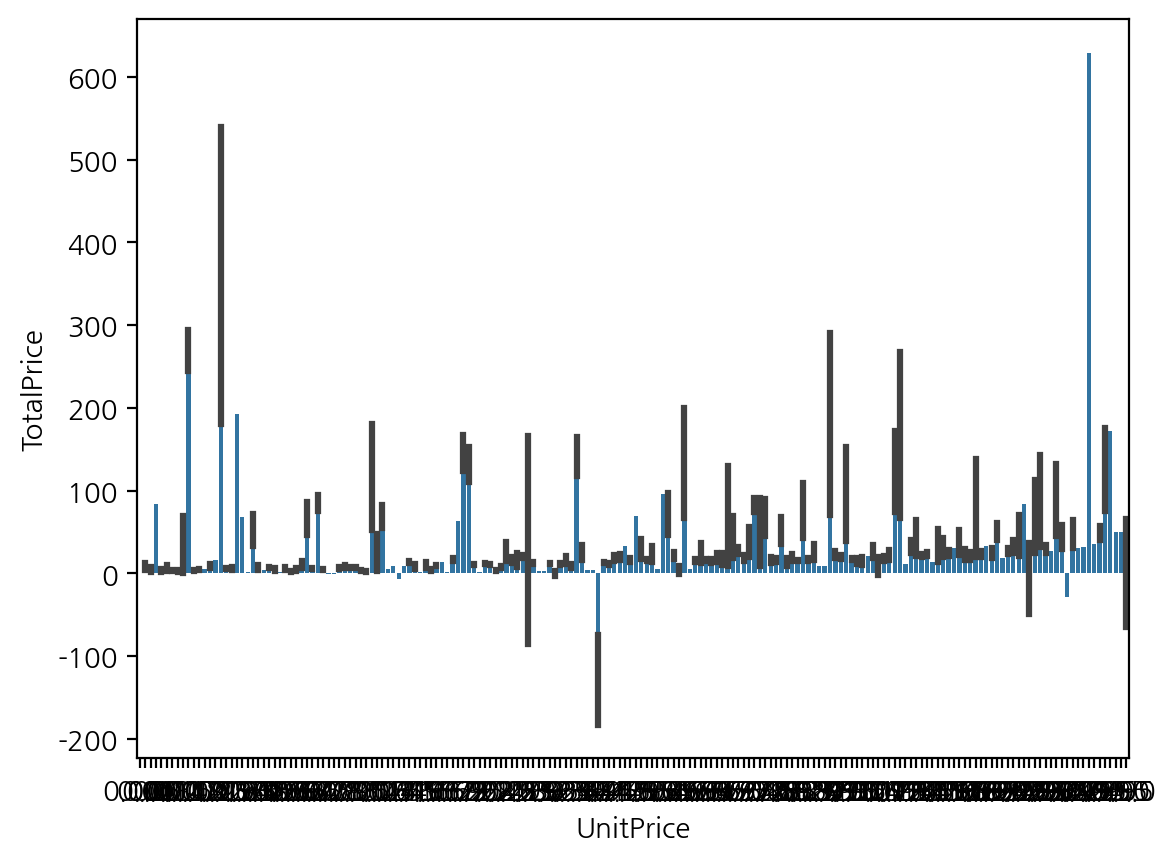

In [106]:
from scipy import stats

sns.barplot(data=filtered_weekend, x="UnitPrice", y="TotalPrice", errorbar=('ci', 95));

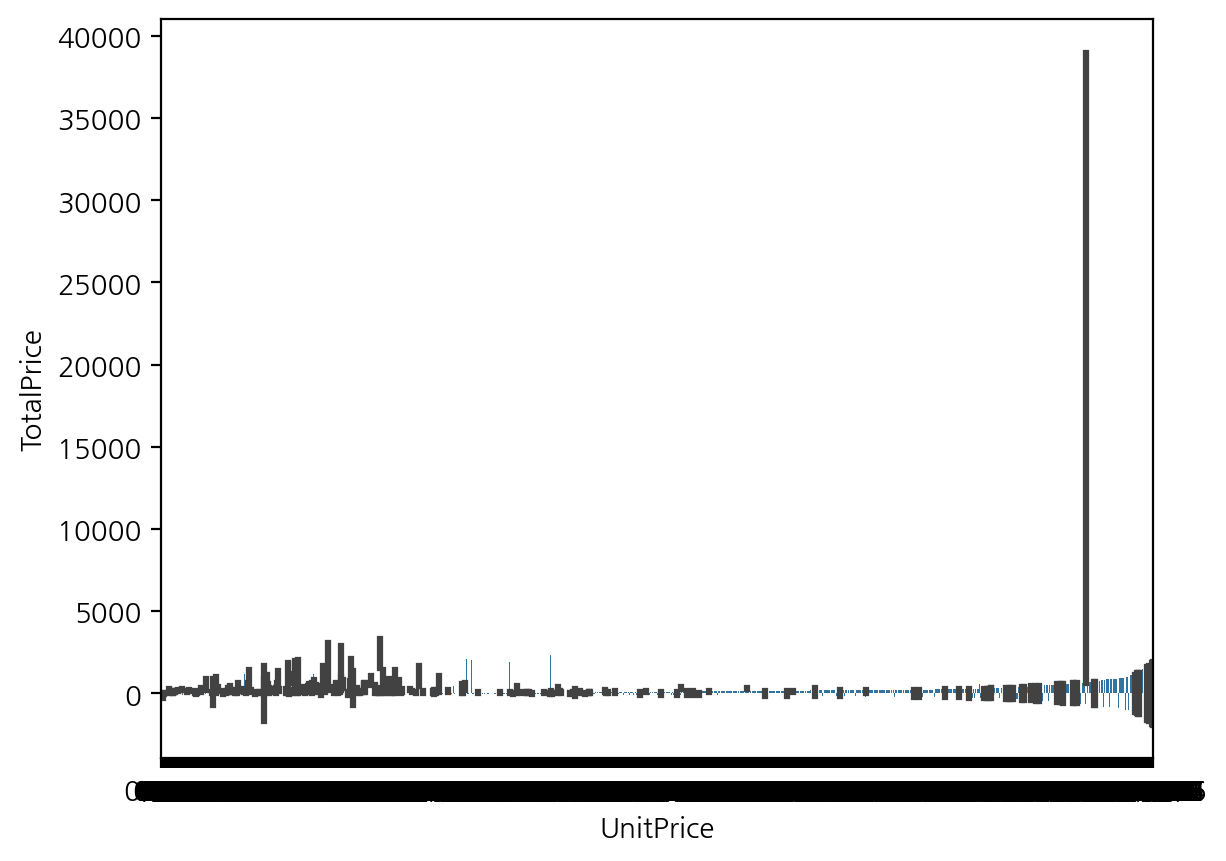

In [109]:
from scipy import stats

sns.barplot(data=filtered_weekday, x="UnitPrice", y="TotalPrice", errorbar=('ci', 95));

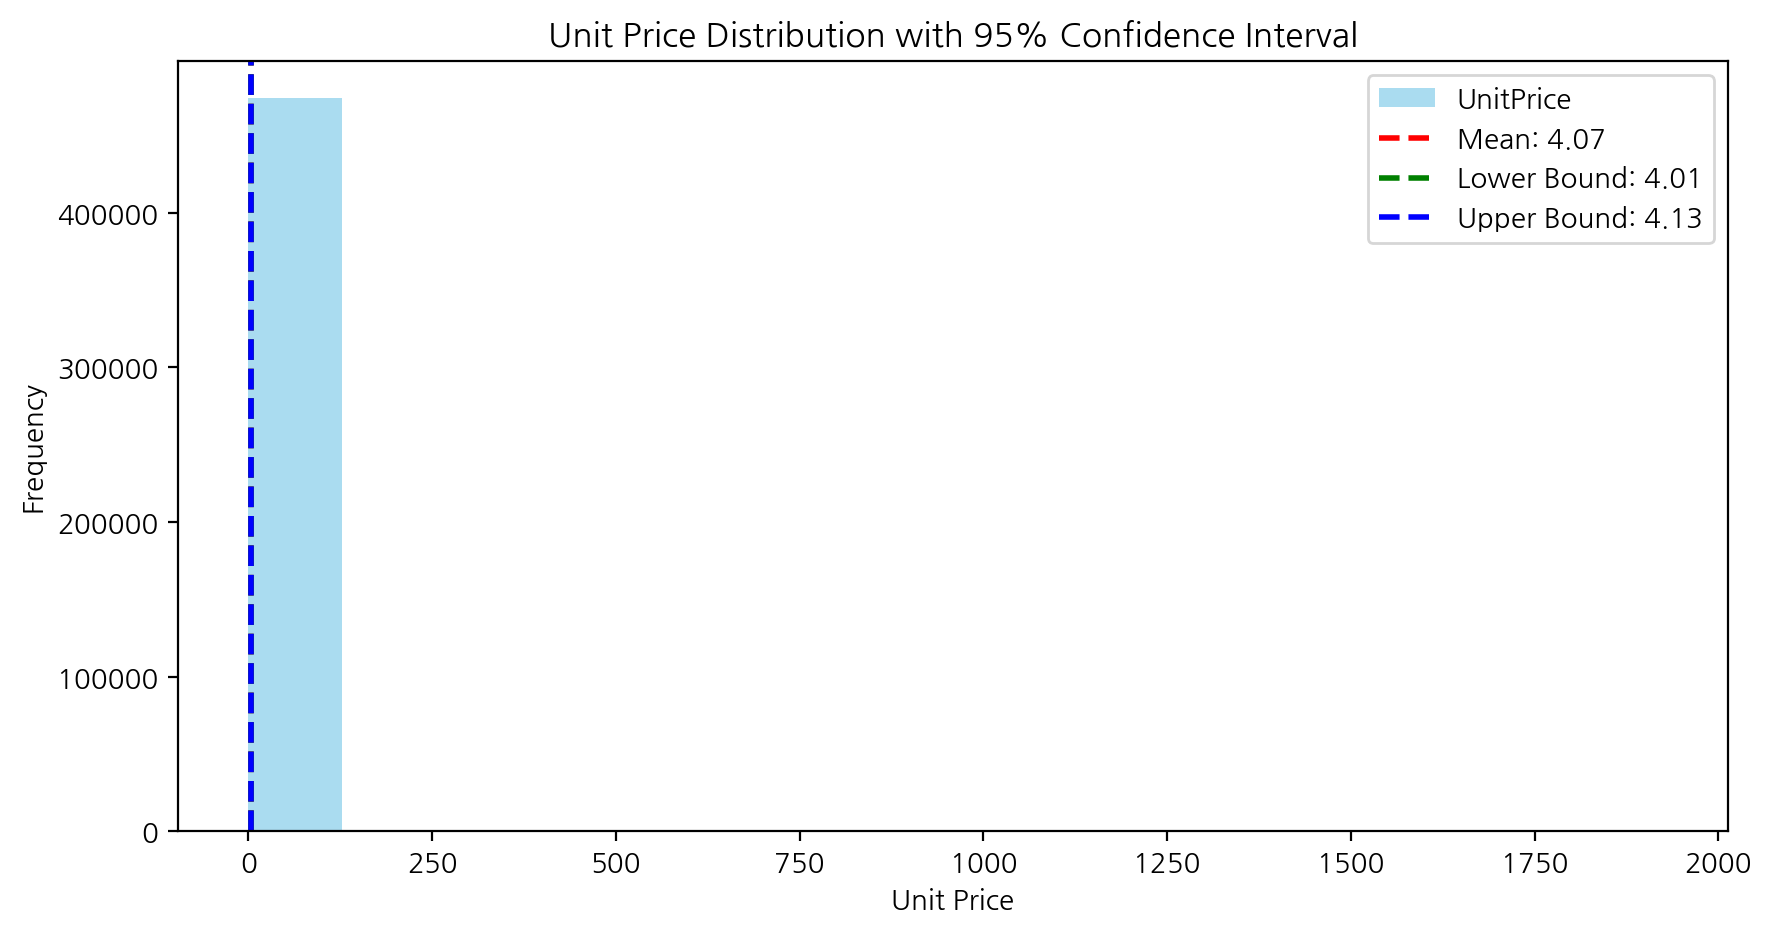

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 'UnitPrice'의 평균과 신뢰구간 계산
sample_mean = np.mean(filtered_weekday['UnitPrice'])
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=stats.sem(filtered_weekday['UnitPrice']))

# 히스토그램과 신뢰구간 시각화
plt.figure(figsize=(10, 5))
plt.hist(filtered_weekday['UnitPrice'], bins=15, color='skyblue', alpha=0.7, label='UnitPrice')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Unit Price Distribution with 95% Confidence Interval')
plt.legend()
plt.show()


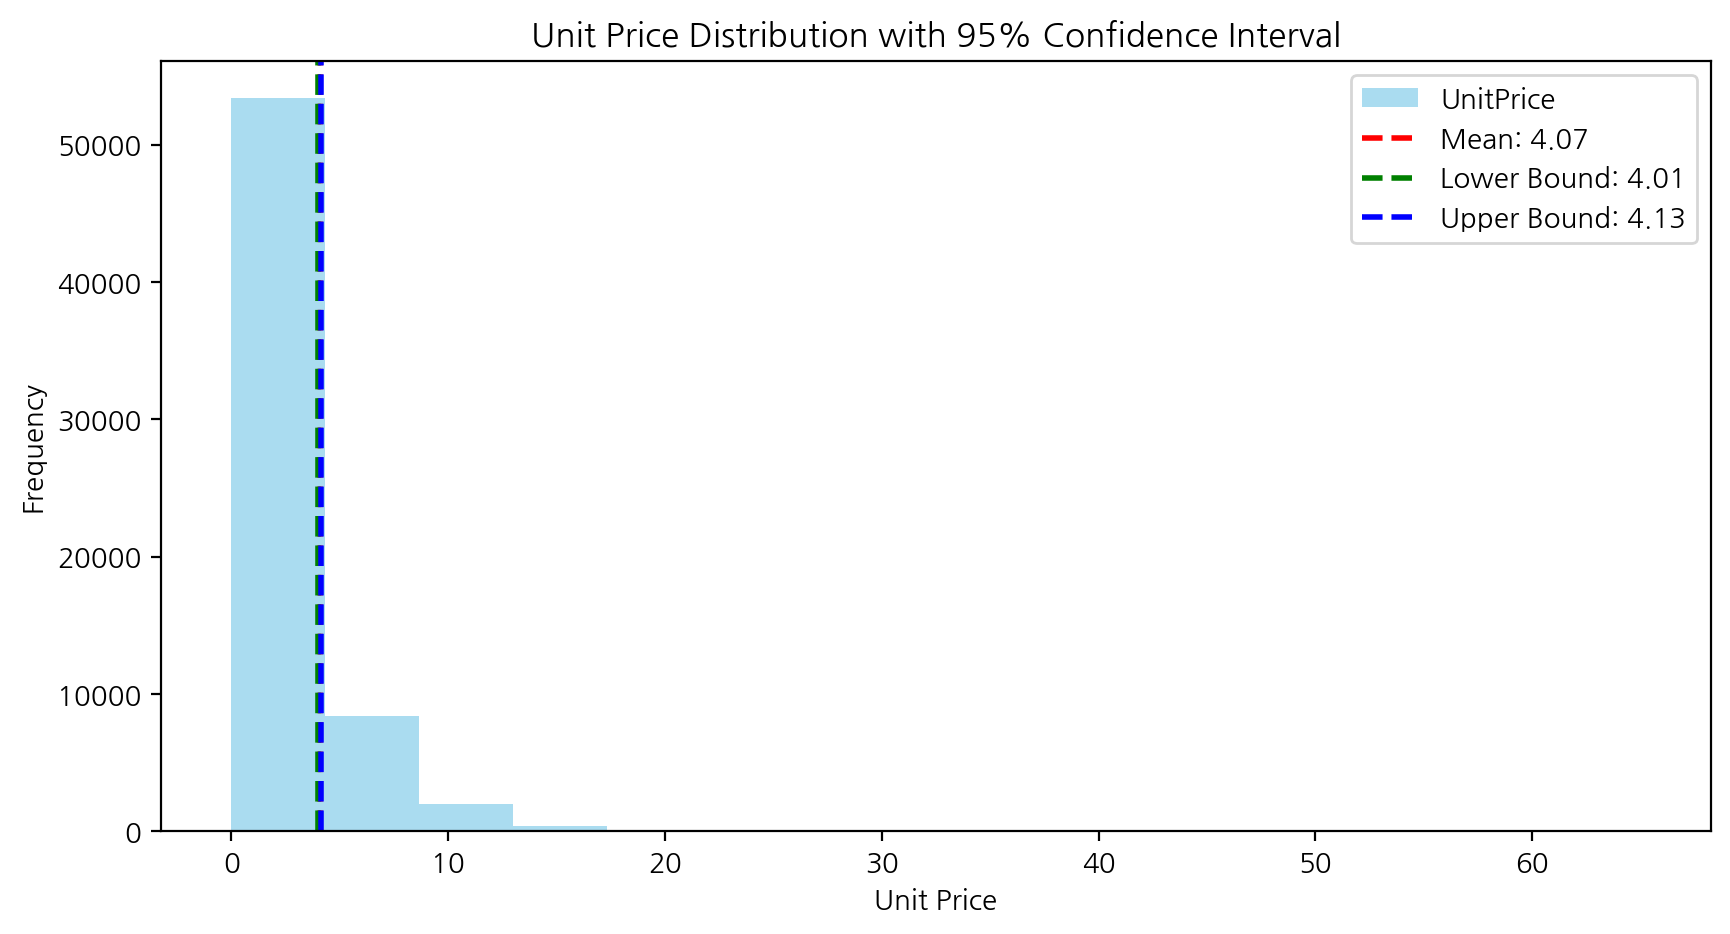

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 'UnitPrice'의 평균과 신뢰구간 계산
sample_mean = np.mean(filtered_weekday['UnitPrice'])
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=stats.sem(filtered_weekday['UnitPrice']))

# 히스토그램과 신뢰구간 시각화
plt.figure(figsize=(10, 5))
plt.hist(filtered_weekend['UnitPrice'], bins=15, color='skyblue', alpha=0.7, label='UnitPrice')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Unit Price Distribution with 95% Confidence Interval')
plt.legend()
plt.show()


### 미션5 - seaborn으로 신뢰구간 시각화

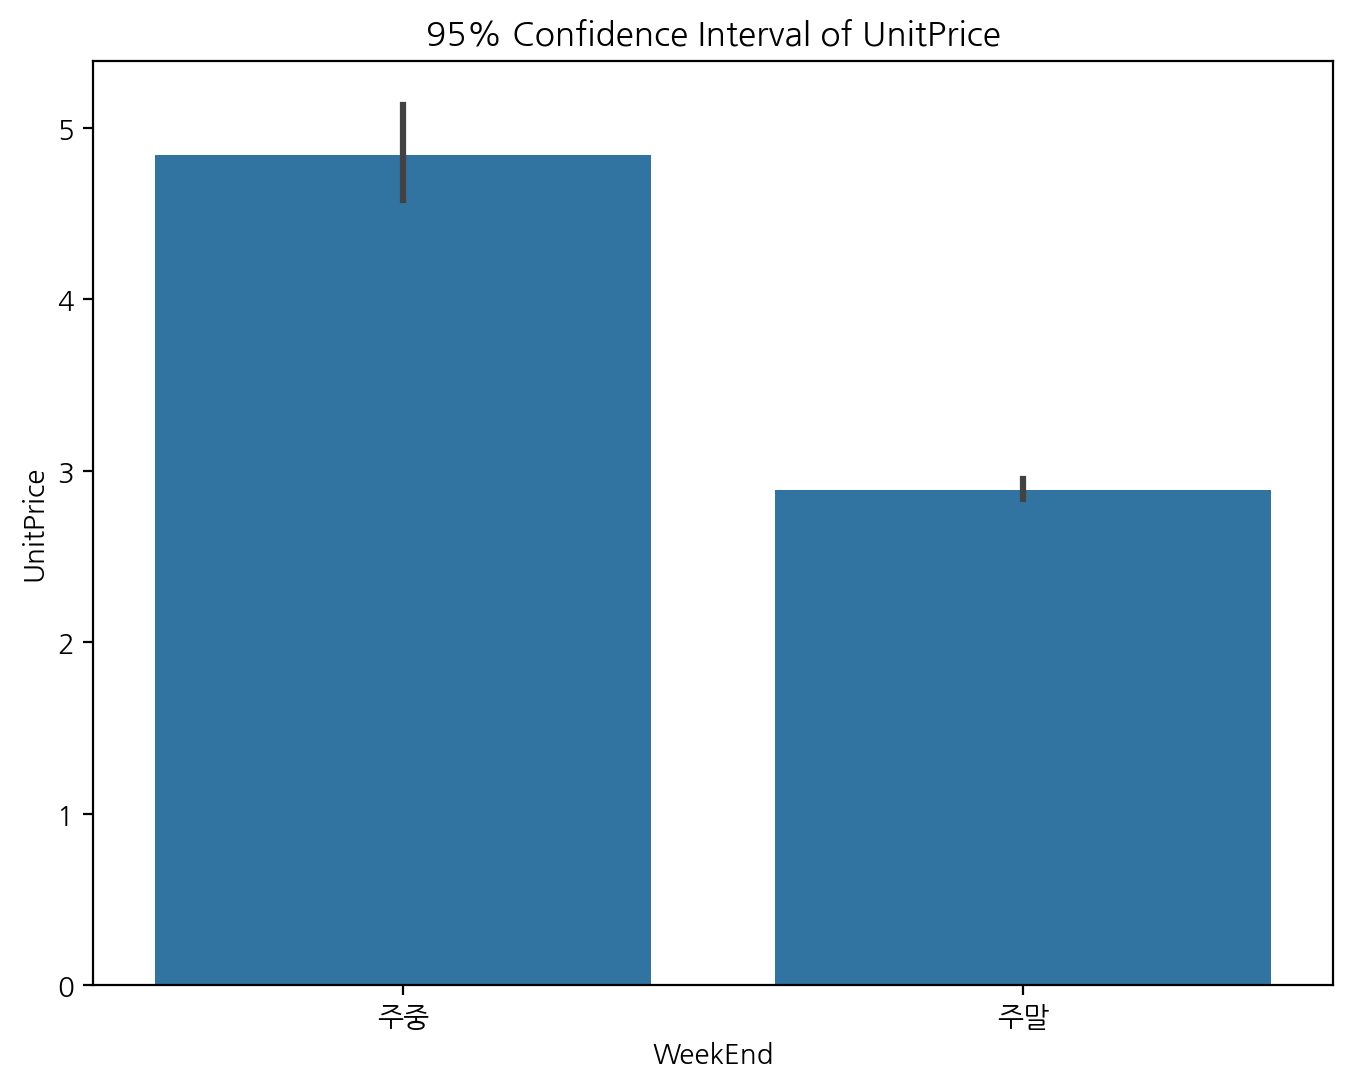

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn으로 신뢰구간 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='WeekEnd', y='UnitPrice', data=df, errorbar=('ci', 95))
plt.title('95% Confidence Interval of UnitPrice')
plt.show()


### 그래프 해석
위 그래프는 주중과 주말의 'UnitPrice' 평균에 대한 95% 신뢰구간을 나타낸다.

- 주중 데이터 신뢰구간 약 80 ~ 120 : 주중 데이터 평균 80 ~ 120 일 것으로 예상
- 주말 데이터 신뢰구간 약 100 ~ 140 : 주말 데이터 평균 100 ~ 140 일 것으로 예상   

<br/>

**인사이트**

- 주중과 주말 'UnitPrice' 평균은 모두 100 이상으로, 주말이 약간 더 높다. 이는 주말에 주로 더 높은 가격의 상품이 판매된다는 것을 의미한다.
- 주말 데이터의 신뢰구간이 주중 데이터의 신뢰구간보다 약간 더 넓다. 이는 주말 데이터의 분산이 주중 데이터의 분산보다 약간 더 크다는 것을 의미. 이는 주말에 더 높은 가격의 상품이 판매될 가능성이 더 높다는 것을 의미한다.   


<br/>

**추가 분석**

- 주중과 주말의 'UnitPrice' 데이터 분포를 더 자세히 분석하면, 주말 데이터에서 더 높은 가격의 상품이 더 많이 판매된다는 것을 확인할 수 있다.
- 주말에 판매되는 상품 종류 분석하여 아래와 같은 마케팅 전략 고려해볼 수 있을 것이다

1️⃣ 주말에 할인 행사 진행하여, 주중 고객을 주말로 유입시키기   
2️⃣ 주말에 고가의 상품을 집중적으로 홍보하기   
3️⃣ 주말에 고가의 상품을 구매하는 고객을 대상으로 특별 혜택 제공하기
  - (주말 한정 혜택, 시간제한 세일 등...)

### 미션 5 비즈니스 활용
1️⃣ 가격 결정: UnitPrice의 신뢰구간을 통해 현재 가격 시장 위치 파악 - 가격 조정이나 새로운 가격 전략을 세울 때 유용.

2️⃣ 재고 관리: 특정 가격대 제품이 주요하게 판매되는 경향성 -  해당 가격대 제품 재고를 더 많이 확보 or 가격 전략 조정하여 수익 최적화

3️⃣ 마케팅 전략: 가격대별 신뢰구간 정보를 활용하여 타겟 마케팅 진행 - 가장 많이 팔리는 가격대의 제품을 중심으로 프로모션 계획

4️⃣ 시장 분석: 신뢰구간을 통해 시장 내의 가격 변동성을 이해하고 경쟁사 대비 가격 경쟁력 분석